<h1>Previsione del punteggio in Matematica</h1>

<h2>Progetto a cura di :</h2>
<ul>
  <li>Capalbo Matteo, matricola: 242482</li>
  <li>Gabriele Nicola, matricola: 242444</li>
</ul>

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
DATASET_LOCATION="./dataset/expandedDataSet.csv" 

In [213]:
ds = pd.read_csv(DATASET_LOCATION)

In [214]:
ds.head(10)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


<h1><b>DESCRIZIONE DEGLI ATTRIBUTI</b></h1>
<ul>
    <li><b>Gender:</b> Gender of the student (male/female)</li>
    <li><b>EthnicGroup:</b> Ethnic group of the student (group A to E)</li>
    <li><b>ParentEduc:</b> Parent(s) education background (from some_highschool to master's degree)</li>
    <li><b>LunchType:</b> School lunch type (standard or free/reduced)</li>
    <li><b>TestPrep:</b> Test preparation course followed (completed or none)</li>
    <li><b>ParentMaritalStatus:</b> Parent(s) marital status (married/single/widowed/divorced)</li>
    <li><b>PracticeSport:</b> How often the student parctice sport (never/sometimes/regularly))</li>
    <li><b>IsFirstChild:</b> If the child is first child in the family or not (yes/no)</li>
    <li><b>NrSiblings:</b> Number of siblings the student has (0 to 7)</li>
    <li><b>TransportMeans:</b> Means of transport to school (schoolbus/private)</li>
    <li><b>WklyStudyHours:</b> Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)</li>
    <li><b>MathScore:</b> math test score(0-100)</li>
    <li><b>ReadingScore:</b> reading test score(0-100)</li>
    <li><b>WritingScore:</b> writing test score(0-100)</li>
</ul>


<h2>Visualizzazione dei dati</h2>

In [215]:
#ds.hist(bins = 50, figsize = (20,15) )
#plt.show()

<h2>Fase di Pre-processing</h2>
In questa prima sezione andremo ad analizzare il dataset e ad effettuare delle statistiche sugli attributi. Cercando di capire quali attributi sono importanti, quali bisogna modificare, affinchè si possano ottenere dei buoni modelli di classificazione, e quali di essi vadano eliminati.

In [216]:
#elimino la colonna TestPrep perchè ha troppi dati mancanti
ds.drop("TestPrep",axis=1,inplace=True)

In [217]:
#elimino la colonna indice perchè non è significativa
ds.drop("Unnamed: 0",axis=1,inplace=True)

In [218]:
#elimino la colonna LunchType perchè non sono sicuro che sia significativa
ds.drop("LunchType",axis=1,inplace=True)

In [219]:
ds.head(10)

,Gender,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,married,regularly,yes,3.00000000,school_bus,< 5,71,71,74
1,female,group C,some college,married,sometimes,yes,0.00000000,NaN,5 - 10,69,90,88
2,female,group B,master's degree,single,sometimes,yes,4.00000000,school_bus,< 5,87,93,91
3,male,group A,associate's degree,married,never,no,1.00000000,NaN,5 - 10,45,56,42
4,male,group C,some college,married,sometimes,yes,0.00000000,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,married,regularly,yes,1.00000000,school_bus,5 - 10,73,84,79
6,female,group B,some college,widowed,never,no,1.00000000,private,5 - 10,85,93,89
7,male,group B,some college,married,sometimes,yes,1.00000000,private,> 10,41,43,39
8,male,group D,high school,single,sometimes,no,3.00000000,private,> 10,65,64,68
9,female,group B,high school,married,regularly,yes,NaN,private,< 5,37,59,50


In [220]:
ds.shape

(30641, 12)

In [221]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   ParentMaritalStatus  29451 non-null  object 
 4   PracticeSport        30010 non-null  object 
 5   IsFirstChild         29737 non-null  object 
 6   NrSiblings           29069 non-null  float64
 7   TransportMeans       27507 non-null  object 
 8   WklyStudyHours       29686 non-null  object 
 9   MathScore            30641 non-null  int64  
 10  ReadingScore         30641 non-null  int64  
 11  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.8+ MB


In [222]:
#eliminiamo le osservazioni che presentano dati mancanti
ds.dropna(inplace=True)

In [223]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20445 entries, 2 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               20445 non-null  object 
 1   EthnicGroup          20445 non-null  object 
 2   ParentEduc           20445 non-null  object 
 3   ParentMaritalStatus  20445 non-null  object 
 4   PracticeSport        20445 non-null  object 
 5   IsFirstChild         20445 non-null  object 
 6   NrSiblings           20445 non-null  float64
 7   TransportMeans       20445 non-null  object 
 8   WklyStudyHours       20445 non-null  object 
 9   MathScore            20445 non-null  int64  
 10  ReadingScore         20445 non-null  int64  
 11  WritingScore         20445 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.0+ MB


In [224]:
#verifichiamo se ci sono delle righe duplicate
ds.drop_duplicates(inplace=True)

In [225]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20445 entries, 2 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               20445 non-null  object 
 1   EthnicGroup          20445 non-null  object 
 2   ParentEduc           20445 non-null  object 
 3   ParentMaritalStatus  20445 non-null  object 
 4   PracticeSport        20445 non-null  object 
 5   IsFirstChild         20445 non-null  object 
 6   NrSiblings           20445 non-null  float64
 7   TransportMeans       20445 non-null  object 
 8   WklyStudyHours       20445 non-null  object 
 9   MathScore            20445 non-null  int64  
 10  ReadingScore         20445 non-null  int64  
 11  WritingScore         20445 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.0+ MB


In [226]:
#Mappiamo Gender su un vettore di variabili dummy
ds.Gender.replace({'male':1,'female':0},inplace=True)

In [227]:
ds.head(10)

,Gender,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,0,group B,master's degree,single,sometimes,yes,4.00000000,school_bus,< 5,87,93,91
4,1,group C,some college,married,sometimes,yes,0.00000000,school_bus,5 - 10,76,78,75
5,0,group B,associate's degree,married,regularly,yes,1.00000000,school_bus,5 - 10,73,84,79
6,0,group B,some college,widowed,never,no,1.00000000,private,5 - 10,85,93,89
7,1,group B,some college,married,sometimes,yes,1.00000000,private,> 10,41,43,39
8,1,group D,high school,single,sometimes,no,3.00000000,private,> 10,65,64,68
11,1,group D,associate's degree,divorced,sometimes,yes,1.00000000,school_bus,5 - 10,40,52,43
12,0,group B,high school,married,regularly,no,1.00000000,private,5 - 10,66,82,74
13,1,group A,some college,single,sometimes,yes,1.00000000,private,> 10,80,73,71
14,0,group A,master's degree,divorced,sometimes,yes,2.00000000,private,< 5,48,53,58


In [228]:
ds_= pd.get_dummies(ds['EthnicGroup'], prefix='EG')
ds = ds.join(ds_).drop('EthnicGroup',axis=1)

In [229]:
ds.head(10)

,Gender,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,EG_group A,EG_group B,EG_group C,EG_group D,EG_group E
2,0,master's degree,single,sometimes,yes,4.00000000,school_bus,< 5,87,93,91,0,1,0,0,0
4,1,some college,married,sometimes,yes,0.00000000,school_bus,5 - 10,76,78,75,0,0,1,0,0
5,0,associate's degree,married,regularly,yes,1.00000000,school_bus,5 - 10,73,84,79,0,1,0,0,0
6,0,some college,widowed,never,no,1.00000000,private,5 - 10,85,93,89,0,1,0,0,0
7,1,some college,married,sometimes,yes,1.00000000,private,> 10,41,43,39,0,1,0,0,0
8,1,high school,single,sometimes,no,3.00000000,private,> 10,65,64,68,0,0,0,1,0
11,1,associate's degree,divorced,sometimes,yes,1.00000000,school_bus,5 - 10,40,52,43,0,0,0,1,0
12,0,high school,married,regularly,no,1.00000000,private,5 - 10,66,82,74,0,1,0,0,0
13,1,some college,single,sometimes,yes,1.00000000,private,> 10,80,73,71,1,0,0,0,0
14,0,master's degree,divorced,sometimes,yes,2.00000000,private,< 5,48,53,58,1,0,0,0,0


In [230]:
ds_= pd.get_dummies(ds['ParentEduc'], prefix='ParEduc')
ds = ds.join(ds_).drop('ParentEduc',axis=1)

In [231]:
ds.head(10)

,Gender,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,...,EG_group B,EG_group C,EG_group D,EG_group E,ParEduc_associate's degree,ParEduc_bachelor's degree,ParEduc_high school,ParEduc_master's degree,ParEduc_some college,ParEduc_some high school
2,0,single,sometimes,yes,4.00000000,school_bus,< 5,87,93,91,...,1,0,0,0,0,0,0,1,0,0
4,1,married,sometimes,yes,0.00000000,school_bus,5 - 10,76,78,75,...,0,1,0,0,0,0,0,0,1,0
5,0,married,regularly,yes,1.00000000,school_bus,5 - 10,73,84,79,...,1,0,0,0,1,0,0,0,0,0
6,0,widowed,never,no,1.00000000,private,5 - 10,85,93,89,...,1,0,0,0,0,0,0,0,1,0
7,1,married,sometimes,yes,1.00000000,private,> 10,41,43,39,...,1,0,0,0,0,0,0,0,1,0
8,1,single,sometimes,no,3.00000000,private,> 10,65,64,68,...,0,0,1,0,0,0,1,0,0,0
11,1,divorced,sometimes,yes,1.00000000,school_bus,5 - 10,40,52,43,...,0,0,1,0,1,0,0,0,0,0
12,0,married,regularly,no,1.00000000,private,5 - 10,66,82,74,...,1,0,0,0,0,0,1,0,0,0
13,1,single,sometimes,yes,1.00000000,private,> 10,80,73,71,...,0,0,0,0,0,0,0,0,1,0
14,0,divorced,sometimes,yes,2.00000000,private,< 5,48,53,58,...,0,0,0,0,0,0,0,1,0,0


In [232]:
ds_= pd.get_dummies(ds['ParentMaritalStatus'], prefix='ParMarStat')
ds = ds.join(ds_).drop('ParentMaritalStatus',axis=1)

In [233]:
ds.head(10)

,Gender,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,EG_group A,...,ParEduc_associate's degree,ParEduc_bachelor's degree,ParEduc_high school,ParEduc_master's degree,ParEduc_some college,ParEduc_some high school,ParMarStat_divorced,ParMarStat_married,ParMarStat_single,ParMarStat_widowed
2,0,sometimes,yes,4.00000000,school_bus,< 5,87,93,91,0,...,0,0,0,1,0,0,0,0,1,0
4,1,sometimes,yes,0.00000000,school_bus,5 - 10,76,78,75,0,...,0,0,0,0,1,0,0,1,0,0
5,0,regularly,yes,1.00000000,school_bus,5 - 10,73,84,79,0,...,1,0,0,0,0,0,0,1,0,0
6,0,never,no,1.00000000,private,5 - 10,85,93,89,0,...,0,0,0,0,1,0,0,0,0,1
7,1,sometimes,yes,1.00000000,private,> 10,41,43,39,0,...,0,0,0,0,1,0,0,1,0,0
8,1,sometimes,no,3.00000000,private,> 10,65,64,68,0,...,0,0,1,0,0,0,0,0,1,0
11,1,sometimes,yes,1.00000000,school_bus,5 - 10,40,52,43,0,...,1,0,0,0,0,0,1,0,0,0
12,0,regularly,no,1.00000000,private,5 - 10,66,82,74,0,...,0,0,1,0,0,0,0,1,0,0
13,1,sometimes,yes,1.00000000,private,> 10,80,73,71,1,...,0,0,0,0,1,0,0,0,1,0
14,0,sometimes,yes,2.00000000,private,< 5,48,53,58,1,...,0,0,0,1,0,0,1,0,0,0


In [234]:
ds_= pd.get_dummies(ds['PracticeSport'], prefix='sport')
ds = ds.join(ds_).drop('PracticeSport',axis=1)

In [235]:
ds.head(10)

,Gender,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,EG_group A,EG_group B,...,ParEduc_master's degree,ParEduc_some college,ParEduc_some high school,ParMarStat_divorced,ParMarStat_married,ParMarStat_single,ParMarStat_widowed,sport_never,sport_regularly,sport_sometimes
2,0,yes,4.00000000,school_bus,< 5,87,93,91,0,1,...,1,0,0,0,0,1,0,0,0,1
4,1,yes,0.00000000,school_bus,5 - 10,76,78,75,0,0,...,0,1,0,0,1,0,0,0,0,1
5,0,yes,1.00000000,school_bus,5 - 10,73,84,79,0,1,...,0,0,0,0,1,0,0,0,1,0
6,0,no,1.00000000,private,5 - 10,85,93,89,0,1,...,0,1,0,0,0,0,1,1,0,0
7,1,yes,1.00000000,private,> 10,41,43,39,0,1,...,0,1,0,0,1,0,0,0,0,1
8,1,no,3.00000000,private,> 10,65,64,68,0,0,...,0,0,0,0,0,1,0,0,0,1
11,1,yes,1.00000000,school_bus,5 - 10,40,52,43,0,0,...,0,0,0,1,0,0,0,0,0,1
12,0,no,1.00000000,private,5 - 10,66,82,74,0,1,...,0,0,0,0,1,0,0,0,1,0
13,1,yes,1.00000000,private,> 10,80,73,71,1,0,...,0,1,0,0,0,1,0,0,0,1
14,0,yes,2.00000000,private,< 5,48,53,58,1,0,...,1,0,0,1,0,0,0,0,0,1


In [236]:
ds.IsFirstChild.replace({'yes':1,'no':0},inplace=True)

In [237]:
ds.TransportMeans.replace({'school_bus':1,'private':0},inplace=True)

In [238]:
ds_= pd.get_dummies(ds['WklyStudyHours'], prefix='studyHours')
ds = ds.join(ds_).drop('WklyStudyHours',axis=1)

In [239]:
ds.head(10)

,Gender,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EG_group A,EG_group B,EG_group C,...,ParMarStat_divorced,ParMarStat_married,ParMarStat_single,ParMarStat_widowed,sport_never,sport_regularly,sport_sometimes,studyHours_5 - 10,studyHours_< 5,studyHours_> 10
2,0,1,4.00000000,1,87,93,91,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,1,1,0.00000000,1,76,78,75,0,0,1,...,0,1,0,0,0,0,1,1,0,0
5,0,1,1.00000000,1,73,84,79,0,1,0,...,0,1,0,0,0,1,0,1,0,0
6,0,0,1.00000000,0,85,93,89,0,1,0,...,0,0,0,1,1,0,0,1,0,0
7,1,1,1.00000000,0,41,43,39,0,1,0,...,0,1,0,0,0,0,1,0,0,1
8,1,0,3.00000000,0,65,64,68,0,0,0,...,0,0,1,0,0,0,1,0,0,1
11,1,1,1.00000000,1,40,52,43,0,0,0,...,1,0,0,0,0,0,1,1,0,0
12,0,0,1.00000000,0,66,82,74,0,1,0,...,0,1,0,0,0,1,0,1,0,0
13,1,1,1.00000000,0,80,73,71,1,0,0,...,0,0,1,0,0,0,1,0,0,1
14,0,1,2.00000000,0,48,53,58,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [240]:
#Analisi della correlazione (Da fare)
ds.corr()

,Gender,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EG_group A,EG_group B,EG_group C,...,ParMarStat_divorced,ParMarStat_married,ParMarStat_single,ParMarStat_widowed,sport_never,sport_regularly,sport_sometimes,studyHours_5 - 10,studyHours_< 5,studyHours_> 10
Gender,1.00000000,0.00753004,0.00001940,0.00927157,0.15818373,-0.24117547,-0.29184370,0.00036623,0.00177390,-0.00482245,...,-0.01787971,0.02386235,-0.01206648,0.00030784,0.00407022,-0.01101161,0.00780583,-0.00216240,-0.00471758,0.00842791
IsFirstChild,0.00753004,1.00000000,-0.11851838,-0.00617200,0.01085489,0.00778622,0.00292951,-0.00610826,0.00961967,-0.00160848,...,0.00631496,0.00413861,-0.01079921,0.00141883,-0.00747458,0.01265724,-0.00706805,0.00364653,-0.00260665,-0.00170216
NrSiblings,0.00001940,-0.11851838,1.00000000,-0.00700297,0.00141171,0.00002279,0.00049679,-0.00322471,-0.00327025,0.00960277,...,0.00859453,-0.00254124,-0.00576010,0.00358478,0.01015720,-0.01493737,0.00743134,-0.00176164,-0.00147710,0.00406337
TransportMeans,0.00927157,-0.00617200,-0.00700297,1.00000000,0.00646781,0.00120737,0.00111129,-0.01536109,0.00918798,-0.01234796,...,-0.00156506,-0.00147709,0.00239442,0.00213028,-0.00209993,-0.00234061,0.00367862,-0.00456585,0.01223846,-0.00849865
MathScore,0.15818373,0.01085489,0.00141171,0.00646781,1.00000000,0.81935856,0.80876268,-0.06713600,-0.10125040,-0.08788177,...,0.00249800,0.00719171,-0.01347129,0.00907285,-0.05500143,0.05221841,-0.01270222,0.02401421,-0.08185065,0.06540536
ReadingScore,-0.24117547,0.00778622,0.00002279,0.00120737,0.81935856,1.00000000,0.95252939,-0.05451955,-0.07427119,-0.04513283,...,0.00705391,-0.00124248,-0.00695709,0.00680189,-0.02353147,0.02392329,-0.00695459,0.01957055,-0.04715418,0.03014610
WritingScore,-0.29184370,0.00292951,0.00049679,0.00111129,0.80876268,0.95252939,1.00000000,-0.06423266,-0.08491209,-0.06447669,...,0.00932440,-0.00466159,-0.00459731,0.00560158,-0.04397113,0.05367244,-0.02161133,0.01422949,-0.05015291,0.04071318
EG_group A,0.00036623,-0.00610826,-0.00322471,-0.01536109,-0.06713600,-0.05451955,-0.06423266,1.00000000,-0.14508163,-0.19761705,...,0.00427809,-0.00204029,-0.00289997,0.00465546,-0.01120616,-0.00412489,0.01159454,0.00316674,-0.00467872,0.00138228
EG_group B,0.00177390,0.00961967,-0.00327025,0.00918798,-0.10125040,-0.07427119,-0.08491209,-0.14508163,1.00000000,-0.34732075,...,-0.01089467,-0.00181027,0.01344522,-0.00550469,0.00603257,-0.00720405,0.00281175,0.00129416,-0.00048599,-0.00112419
EG_group C,-0.00482245,-0.00160848,0.00960277,-0.01234796,-0.08788177,-0.04513283,-0.06447669,-0.19761705,-0.34732075,1.00000000,...,-0.00585646,0.00897304,-0.00490197,-0.00110558,-0.00246088,0.00259139,-0.00081331,0.00525824,0.00584104,-0.01382483


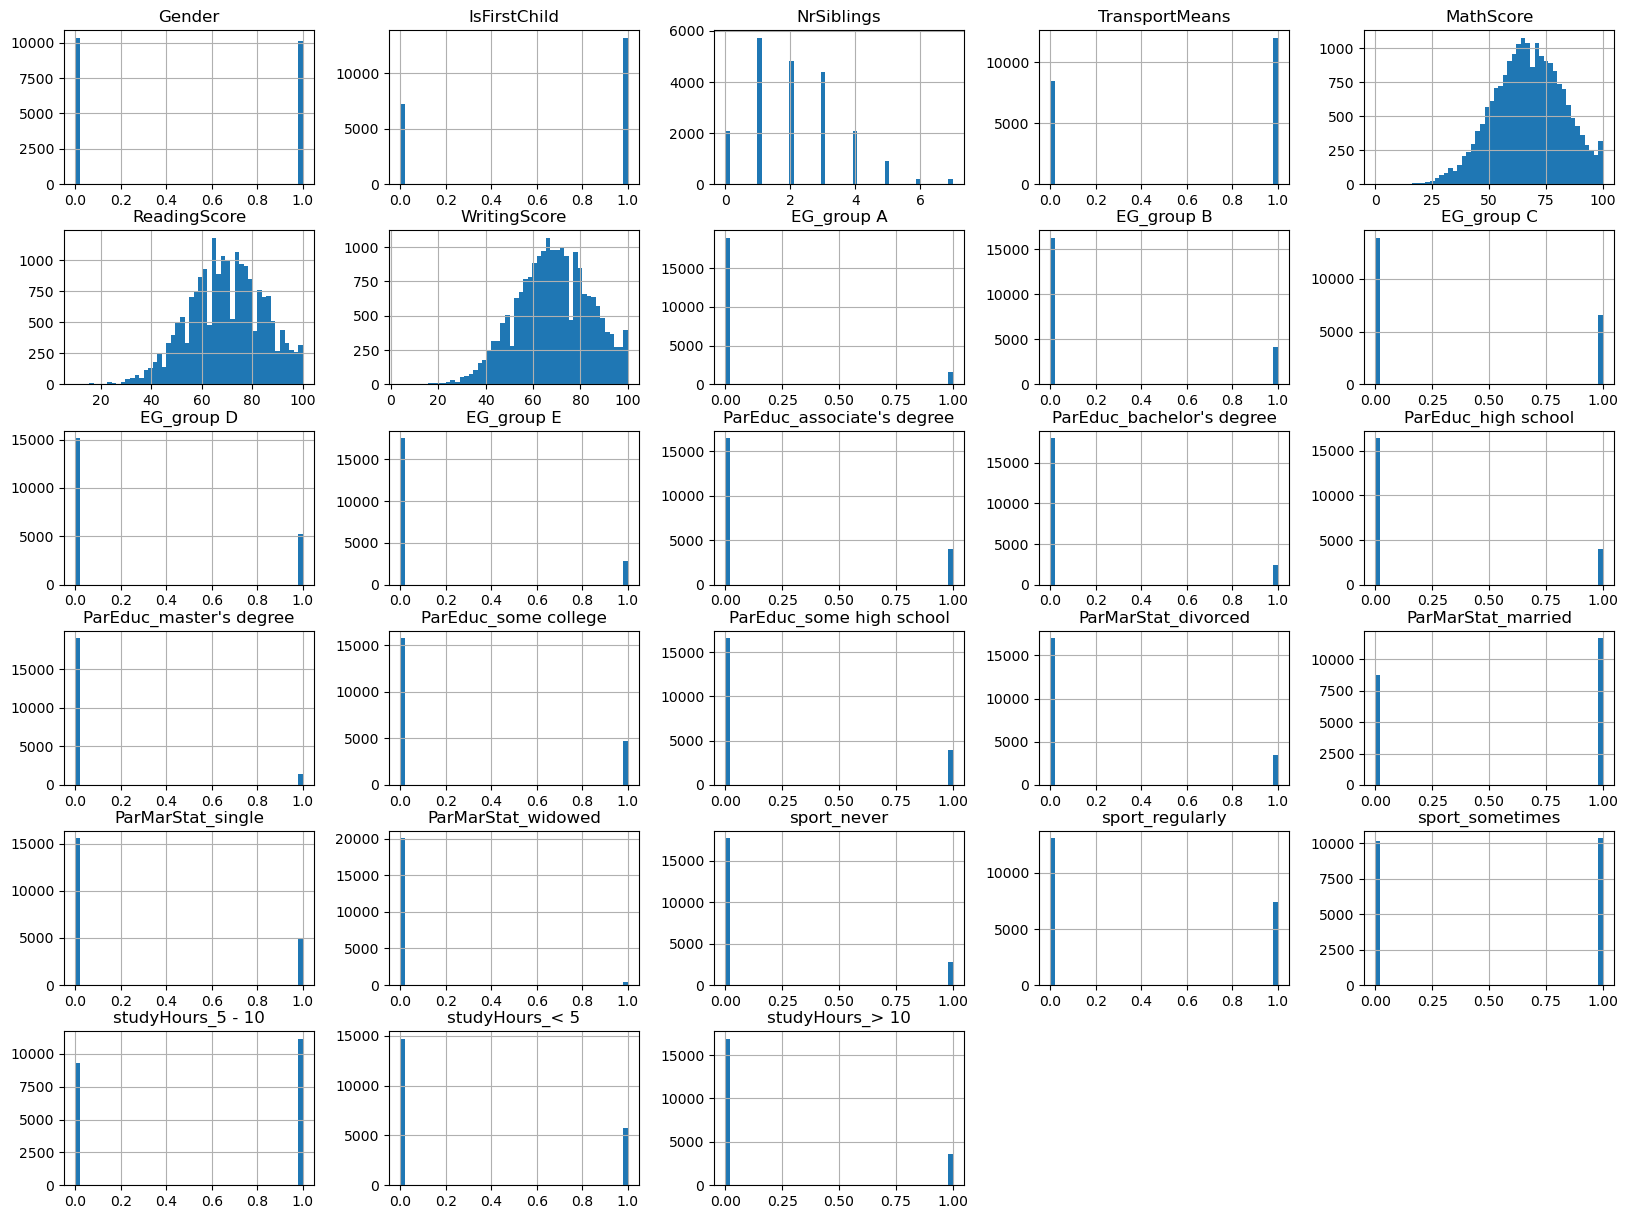

In [242]:
#ds_copy = ds.copy() # questa riga serve per avere il dataset per provare la standardizzazione di sklearn ( alla fine)
ds.hist(bins = 50, figsize = (20,15) )
plt.show()

In [67]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
#Introduciamo la standardizzazione automatica di scikit learn
lista = ds.columns.values.tolist()
diz = {}
for i in range(len(lista)):
    diz[i] = lista[i]
scaler = preprocessing.StandardScaler().fit(ds)
X_scaled = scaler.transform(ds)
#Viene mantenuto l'ordine delle colonne quando si standardizza, quindi andiamo a sostituire gli indici con i nomi
#delle colonne del Dataset, questo ci servirà per suddividere il Dataset in Train e Test -set
dsn = pd.DataFrame(X_scaled)
dsn.rename(diz, axis='columns', inplace=True) 

In [68]:
#Suddividiamo il Dataset standardizzato in Train e Test set
X = dsn.drop('MathScore',axis=1)
Y = dsn['MathScore']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

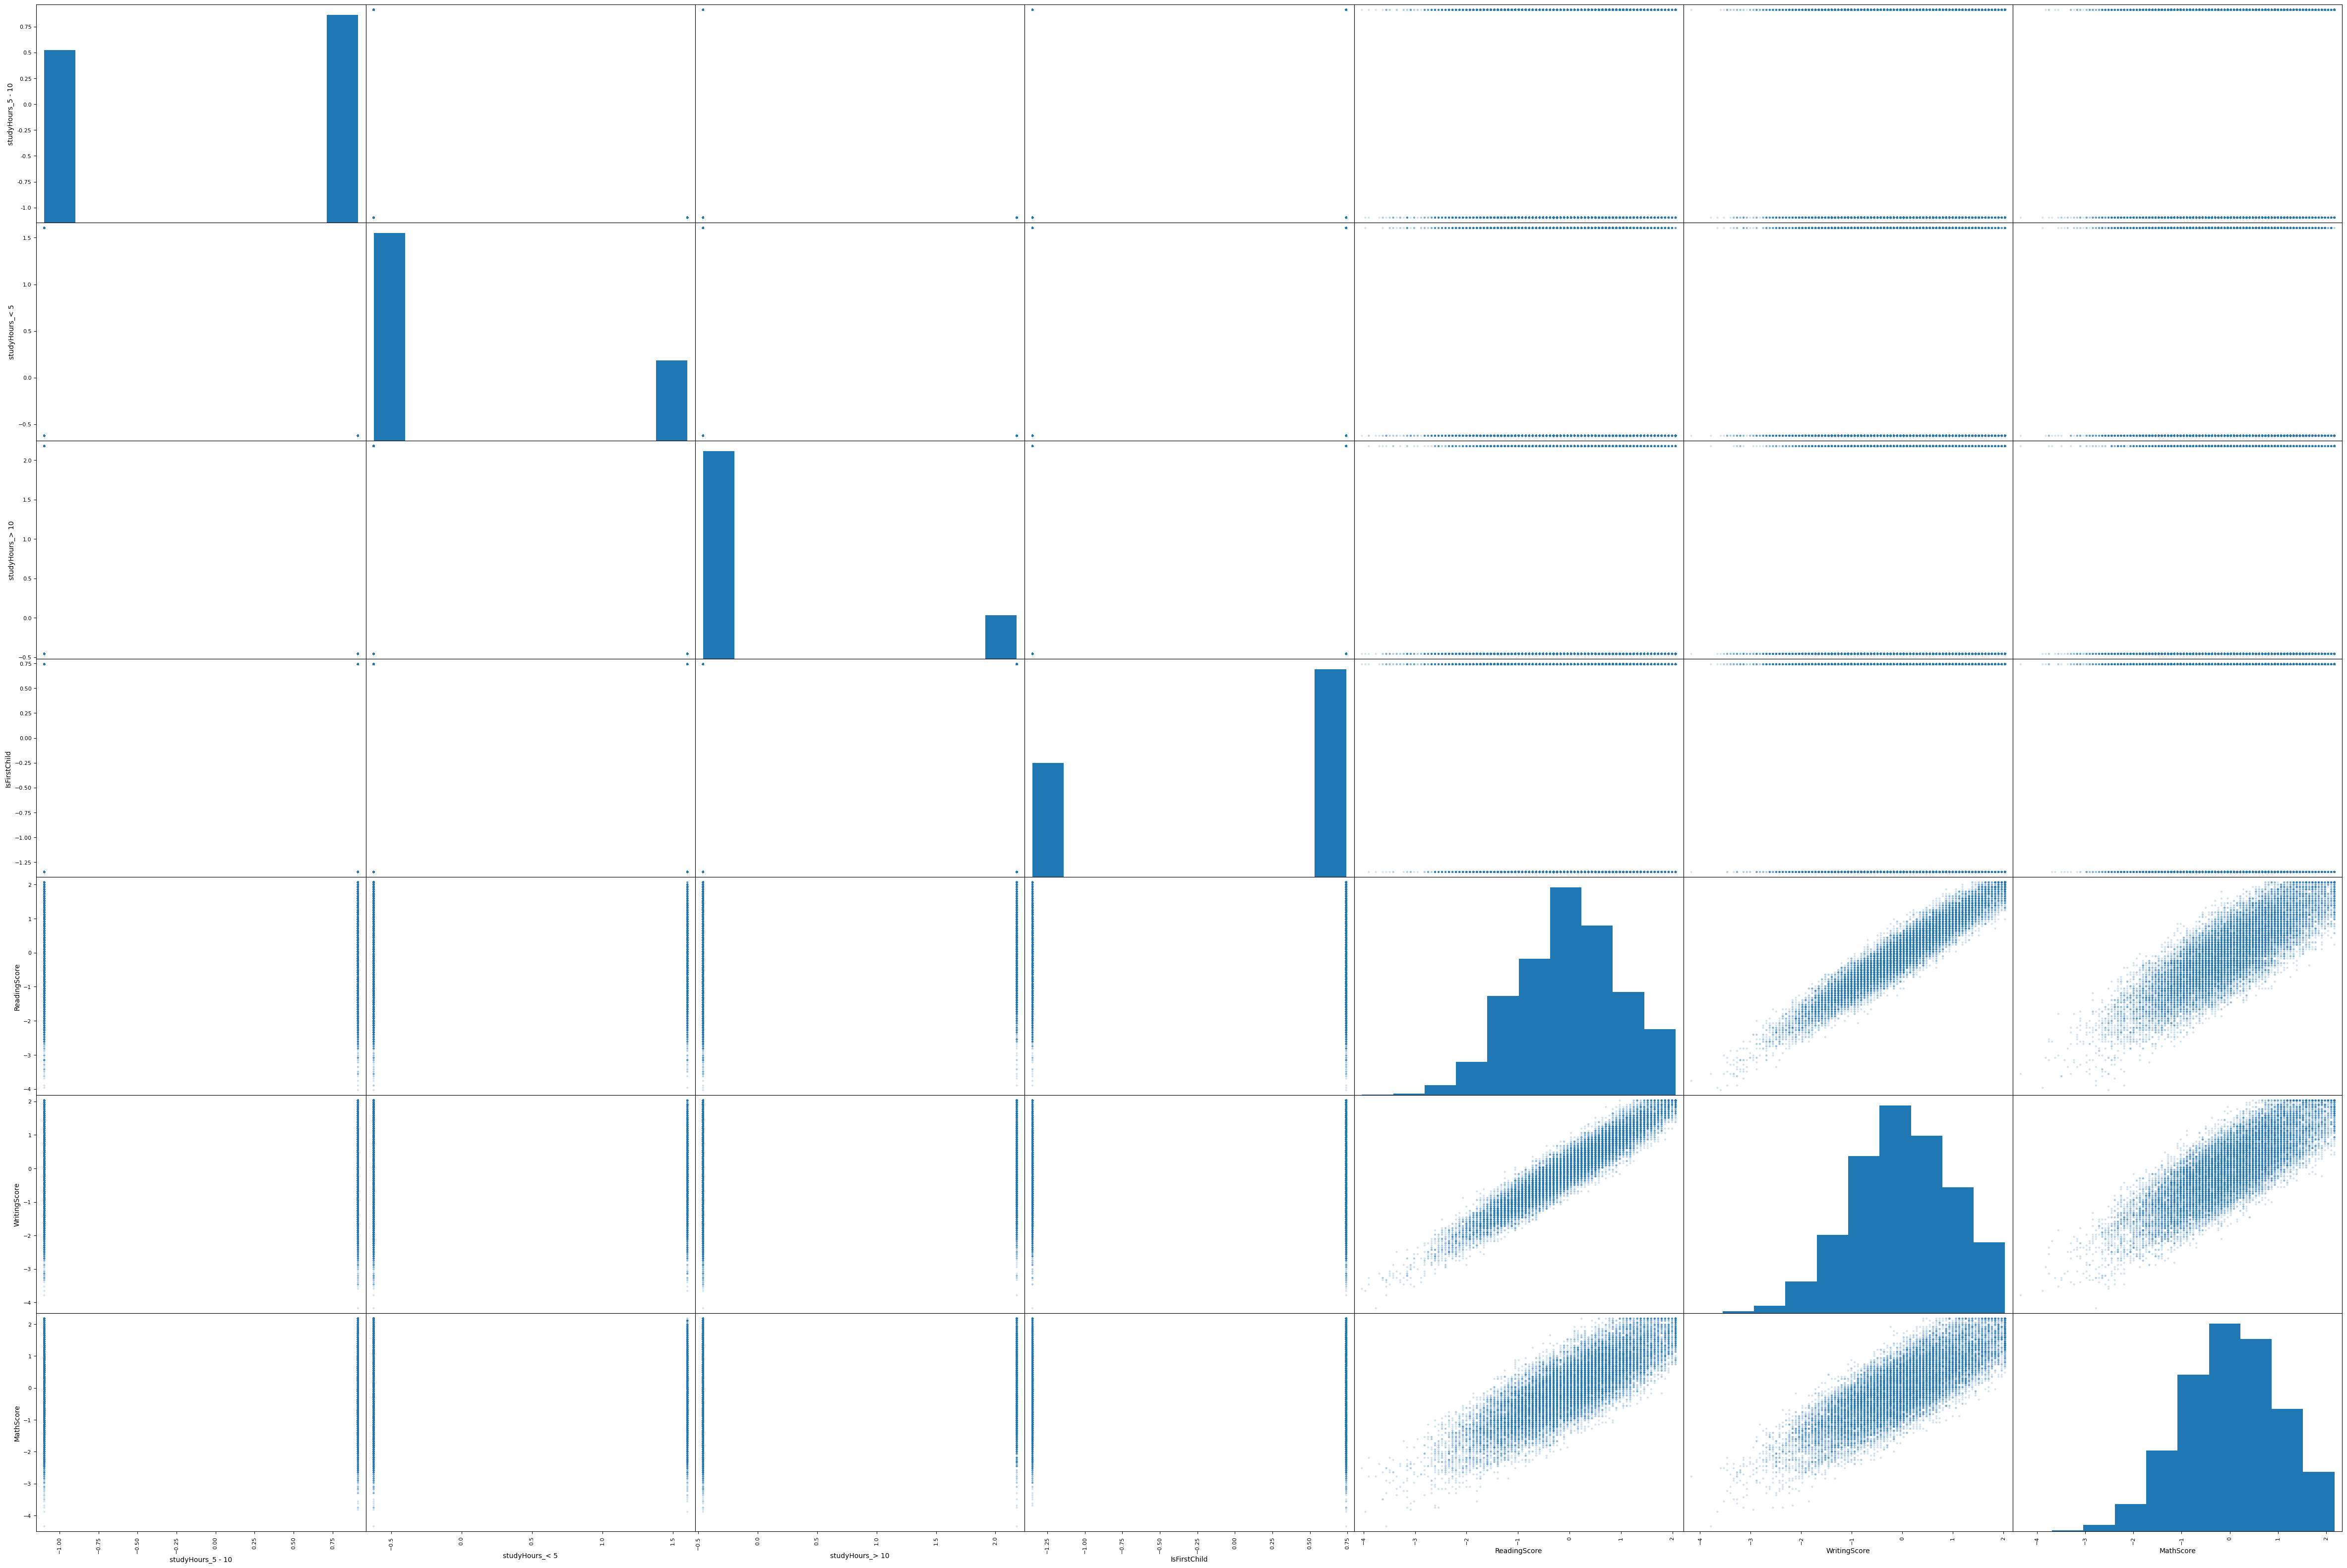

In [138]:
import numpy as np
np.random.seed(50)

from pandas.plotting import scatter_matrix

#dsn.info()
attributes = ['studyHours_5 - 10','studyHours_< 5','studyHours_> 10','IsFirstChild','ReadingScore','WritingScore','MathScore']

scatter_matrix(dsn[attributes], figsize=(60,40),alpha=0.2)
plt.show()


In [70]:
#Definiamo la funzione compute_performance così da poter poi stampare
#la tabella con le varie perfomance dei diversi modelli
#from sklearn.model_selection import cross_val_predict, cross_val_score

import time

pd.options.display.float_format = '{:.8f}'.format

def compute_performance(modelli,names,X,y):
    score_dict = {}
    score_dict['Modello'] = {}
    score_dict['mse'] = {}
    score_dict['variance'] = {}
    score_dict['mae'] = {}
    score_dict['mape'] = {}
    score_dict['median_ae'] = {}
    score_dict['r2'] = {}
    score_dict['adjusted_r2'] = {}
    
    

    for i in range(len(modelli)):
        value_predictions = modelli[i].predict(X)
        mse = mean_squared_error(y, value_predictions)
        variance = explained_variance_score(y,value_predictions)
        mae = mean_absolute_error(y,value_predictions)
        mape = mean_absolute_percentage_error(y, value_predictions)
        median_ae = median_absolute_error(y, value_predictions)
        r2 = r2_score(y, value_predictions)
        adjusted_r2 = 1 - ( 1-r2 ) * ( len(value_predictions) - 1 ) / ( len(value_predictions) - X.shape[1] - 1 )

        name = names[i]

        score_dict['Modello'][i] = name
        score_dict['mse'][i] = mse
        score_dict['variance'][i] = variance
        score_dict['mae'][i] = mae
        score_dict['mape'][i] = mape
        score_dict['median_ae'][i] = median_ae
        score_dict['r2'][i] = r2
        score_dict['adjusted_r2'][i] = adjusted_r2
        
        
    return score_dict

In [71]:
import pickle
regressori = []
nomi = []

<h1> Modelli SVM </h1>

In [72]:
modelli_svm = []

In [73]:
from sklearn.svm import SVR

#svr_reg = SVR()
#svr_reg.fit(X_train,y_train)

# Salviamo il modello sul disco
#filename = './Modelli/svr_reg.sav'
#pickle.dump(svr_reg, open(filename, 'wb'))

In [74]:
# Carichiamo il modello dal disco
filename = './Modelli/svr_reg.sav'
svr_reg = pickle.load(open(filename, 'rb'))

#print(lin_reg)
regressori.append(svr_reg)
nomi.append("SVR Regressor")
modelli_svm.append("SVR Regressor")

<h1>Modelli Lineari</h1></n>

In [75]:
modelli_lineari = []

<h2>Linear Regressor</h2>

In [76]:
from sklearn.linear_model import LinearRegression

#lin_reg = LinearRegression()
#lin_reg = lin_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/lin_reg.sav'
#pickle.dump(lin_reg, open(filename, 'wb'))



In [77]:
# Carichiamo il modello dal disco
filename = './Modelli/lin_reg.sav'
lin_reg = pickle.load(open(filename, 'rb'))
#print(lin_reg)

regressori.append(lin_reg)
nomi.append("Linear Regressor")
modelli_lineari.append("Linear Regressor")

<h1>SGD Regressor</h1>

In [83]:
from sklearn.linear_model import SGDRegressor

#sgd_reg = SGDRegressor(random_state=42) 
#sgd_reg.fit(X_train, y_train)

#Salviamo il modello sul disco
#filename = './Modelli/sgd_reg.sav'
#pickle.dump(sgd_reg, open(filename, 'wb'))


In [84]:
#Carichiamo il modello dal disco
filename = './Modelli/sgd_reg.sav'
sgd_reg = pickle.load(open(filename, 'rb'))

#print(lin_reg)
regressori.append(sgd_reg)
nomi.append("SGD Regressor")
modelli_lineari.append("SGD Regressor")

<h1>Ensemble Models</h1>

In [85]:
modelli_ensemble = []

<h2>Random Forest</h2>

In [86]:
from sklearn.ensemble import RandomForestRegressor

#forest_reg = RandomForestRegressor(random_state=42) 
#forest_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/forest_reg.sav'
#pickle.dump(forest_reg, open(filename, 'wb'))


In [87]:
# Carichiamo il modello dal disco
filename = './Modelli/forest_reg.sav'
forest_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

regressori.append(forest_reg)
nomi.append("Forest Regressor")
modelli_lineari.append("Forest Regressor")

<h2>AdaBoost Regressor</h2>

In [88]:
from sklearn.ensemble import AdaBoostRegressor

#ada_reg = AdaBoostRegressor(random_state=42)
#ada_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/ada_reg.sav'
#pickle.dump(ada_reg, open(filename, 'wb'))


In [89]:
# Carichiamo il modello dal disco
filename = './Modelli/ada_reg.sav'
ada_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

regressori.append(ada_reg)
nomi.append("Ada Regressor")
modelli_ensemble.append("Ada Regressor")

<h2>Bagging Regressor</h2>

In [90]:
from sklearn.ensemble import BaggingRegressor

#bagging_reg = BaggingRegressor(random_state=42)
#bagging_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/bagging_reg.sav'
#pickle.dump(bagging_reg, open(filename, 'wb'))

# Carichiamo il modello dal disco
filename = './Modelli/bagging_reg.sav'
bagging_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

In [91]:
regressori.append(bagging_reg)
nomi.append("Bagging Regressor")
modelli_ensemble.append("Bagging Regressor")

<h1>Neural networks</h1>

In [92]:
reti_neurali = []

In [93]:
from sklearn.neural_network import MLPRegressor

#mlp_reg = MLPRegressor()
#mlp_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/mlp_reg.sav'
#pickle.dump(mlp_reg, open(filename, 'wb'))

# Carichiamo il modello dal disco
filename = './Modelli/mlp_reg.sav'
mlp_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

In [94]:
regressori.append(mlp_reg)
nomi.append("MLP Regressor")
reti_neurali.append("MLP Regressor")

<h1>Modelli ad Albero</h1>


In [95]:
modelli_alberi = []

<h2>DecisionTree Regressor</h2>

In [96]:
from sklearn.tree import DecisionTreeRegressor

#tree_reg = DecisionTreeRegressor(random_state=42)
#tree_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/tree_reg.sav'
#pickle.dump(tree_reg, open(filename, 'wb'))

# Carichiamo il modello dal disco
filename = './Modelli/tree_reg.sav'
tree_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

In [97]:
regressori.append(tree_reg)
nomi.append("DecisionTree Regressor")
modelli_alberi.append("DecisionTree Regressor")

<h1>Regressori basati su Istance</h1>

In [98]:
modelli_istance = []

<h2>K Neighbour Regressor</h2>

In [99]:
from sklearn.neighbors import KNeighborsRegressor

#kn_reg = KNeighborsRegressor()
#kn_reg.fit(X_train, y_train)

# Salviamo il modello sul disco
#filename = './Modelli/kn_reg.sav'
#pickle.dump(kn_reg, open(filename, 'wb'))

# Carichiamo il modello dal disco
filename = './Modelli/kn_reg.sav'
kn_reg = pickle.load(open(filename, 'rb'))
# print(lin_reg)

In [100]:
regressori.append(kn_reg)
nomi.append("K Neighbor Regressor")
modelli_istance.append("K Neighbor Regressor")

<h1>Performance modelli - Training set</h1>

In [101]:
#performance_modelli_training = compute_performance(regressori, nomi, X_train,y_train)
#performance_train = pd.DataFrame(performance_modelli_training)
#performance_train

# Salviamo le performance ottenute su disco
#filename = './Performance/performance_train.csv'
#pickle.dump(performance_train, open(filename, 'wb'))


In [102]:
#Carichiamo il file delle performance dal disco
filename = './Performance/performance_train.csv'
performance_train = pickle.load(open(filename, 'rb'))
performance_train

,Modello,mse,variance,mae,mape,median_ae,r2,adjusted_r2
0,SVR Regressor,0.12195848,0.87725161,0.26870546,1.03530523,0.20032292,0.87724276,0.87703977
1,Linear Regressor,0.14709927,0.85193736,0.30654054,1.14857732,0.25834413,0.85193731,0.85169247
2,SGD Regressor,0.14841254,0.85068777,0.30780980,1.13705514,0.26030930,0.85061544,0.85036841
3,Forest Regressor,0.02301149,0.97683787,0.11995947,0.45450426,0.10092052,0.97683780,0.97679950
4,SGD Regressor,0.14800383,0.85103716,0.30752330,1.15911334,0.25887993,0.85102683,0.85078048
5,Forest Regressor,0.02304623,0.97680318,0.11991585,0.45039189,0.09961832,0.97680283,0.97676447
6,Ada Regressor,0.17477926,0.82584737,0.33589297,1.17053418,0.28798054,0.82407603,0.82378512
7,Bagging Regressor,0.06120816,0.93839315,0.17359924,0.65296263,0.11719802,0.93839096,0.93828908
8,MLP Regressor,0.13513931,0.86511004,0.29428304,1.09616081,0.24778962,0.86397560,0.86375067
9,DecisionTree Regressor,0.06349860,0.93608553,0.08995420,0.33979452,0.00000000,0.93608552,0.93597983


<h1>Performance modelli - Test set</h1>

In [103]:
#performance_modelli_training = compute_performance(regressori, nomi, X_test,y_test)
#performance_test = pd.DataFrame(performance_modelli_training)
#performance_test

# Salviamo le performance ottenute su disco
#filename = './Performance/performance_test.csv'
#pickle.dump(performance_test, open(filename, 'wb'))


In [104]:
# Carichiamo il file delle performance dal disco
filename = './Performance/performance_test.csv'
performance_test = pickle.load(open(filename, 'rb'))
performance_test

,Modello,mse,variance,mae,mape,median_ae,r2,adjusted_r2
0,SVR Regressor,0.16680574,0.83744676,0.32555671,1.19444358,0.27591553,0.83726670,0.83618475
1,Linear Regressor,0.15029438,0.85345359,0.30874208,1.13414408,0.25892633,0.85337495,0.85240010
2,SGD Regressor,0.15166145,0.85204208,0.30991128,1.12818163,0.25953634,0.85204126,0.85105754
3,Forest Regressor,0.16717717,0.83712113,0.32564025,1.19102706,0.27541535,0.83690434,0.83581998
4,SGD Regressor,0.15126847,0.85245626,0.30991328,1.14330405,0.26053513,0.85242465,0.85144348
5,Forest Regressor,0.16727891,0.83698973,0.32514001,1.19727141,0.27210559,0.83680509,0.83572007
6,Ada Regressor,0.17743623,0.82749446,0.33464106,1.16143160,0.28469474,0.82689575,0.82574485
7,Bagging Regressor,0.06008035,0.94138649,0.17189346,0.60744976,0.11719802,0.94138647,0.94099677
8,MLP Regressor,0.13372078,0.87014083,0.28999129,1.06822244,0.24284211,0.86954392,0.86867657
9,DecisionTree Regressor,0.06191248,0.93963015,0.08889133,0.34590719,0.00000000,0.93959907,0.93919748
